# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

We will examine some data representing the miles-per-gallon of 398 cars given other variables describing them:

1. mpg: continuous. The miles-per-gallon of the car.
2. cylinders: multi-valued discrete. Number of cylinders.
3. displacement: continuous. Engine displacement of the car. 
4. horsepower: continuous. Total horsepower of the car.
5. weight: continuous. Weight in lbs.
6. acceleration: continuous. Acceleration 0-60mph in seconds.
9. car name: string (unique for each instance)

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [75]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline

In [76]:
# Uncomment if using Google Colab or Kaggle Kernels.
# Imports the data using gdown.
!gdown https://drive.google.com/uc?id=1PtY3ne37XA8Jk_cAf0Cd7JSRvEU8KDbp

Downloading...
From: https://drive.google.com/uc?id=1PtY3ne37XA8Jk_cAf0Cd7JSRvEU8KDbp
To: /content/car_data.csv
100% 15.9k/15.9k [00:00<00:00, 14.5MB/s]



## Part 1
### Question 1.1:  /10 points


Read the `car_data.csv` file as a `pandas.DataFrame` and show its descriptive statistics.  Investigate the relationship between the cars' weight and their mpg by plotting a scatter plot of the `weight` (x axis) and `mpg` columns (y axis). Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. Remember to label your axes.

          MPG  cylinders  displacement  horsepower   weight  acceleration
count  392.00     392.00        392.00      392.00   392.00        392.00
mean    23.45       5.47        194.41      104.47  2977.58         15.54
std      7.81       1.71        104.64       38.49   849.40          2.76
min      9.00       3.00         68.00       46.00  1613.00          8.00
25%     17.00       4.00        105.00       75.00  2225.25         13.78
50%     22.75       4.00        151.00       93.50  2803.50         15.50
75%     29.00       8.00        275.75      126.00  3614.75         17.02
max     46.60       8.00        455.00      230.00  5140.00         24.80


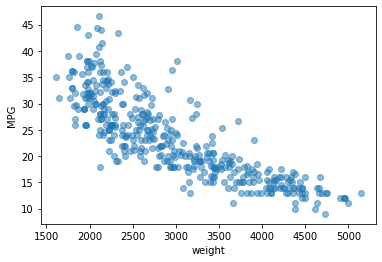

In [77]:
# YOUR CODE HERE
df = pd.read_csv('car_data.csv')
print(round(df.describe(),2))
df["MPG"].mode()

plt.scatter(df.weight,df.MPG,alpha=0.5)
plt.xlabel("weight")
plt.ylabel("MPG");

**Written answer: What do you see here? Discuss your findings**

The mpg decreases as the weight increases. The slope of the fitted model line of mpg is negative. And the relationship between weight and mpg is not strictly linear. 

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values. 

Report $\hat{\mathbf{y}}$. 

What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [78]:
# Your code here.
def linearModelPredict(b,X):
  predY=np.dot(X,b)
  return predY
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
linearModelPredict(b,X)


array([ 0.1, -0.2,  0.7])

### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 


In [79]:
# Your code here.
def linearModelLossRSS(b,X,y):
  predY = linearModelPredict(b,X)
  res = y-predY
  rss = np.sum(res**2)
  d_beta0 = -2*np.sum(res)
  d_beta1 = -2*sum(res*X[:,1])
  gradient = np.append(np.array(d_beta0),d_beta1)
  return (rss,gradient)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
linearModelLossRSS(b,X,y)


(2.06, array([-3.6, -4. ]))

**Written answer**: To minimize the loss, do you need increase or decrease the value of the parameters? 

To minimize the loss, we need increase the value of the parameters. Since the gradient is negative. 

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2 


In [80]:
# Your code here
import scipy.optimize as so
def linearModelFit(X,y,lossfcn):
  bstart = [1,1]
  result = so.minimize(lossfcn,bstart,args=(X,y), jac=True ,method='Powell')
  betas = result.x
  mean = np.mean(y)
  predY = linearModelPredict(betas,X)
  res = y-predY
  sst = np.sum((y-mean)**2)
  r2 = 1-(sum(res**2)/sst)
  return (betas,r2)

X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 

linearModelFit(X,y,linearModelLossRSS)


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)


(array([0.6, 0.6]), 0.75)

### Question 1.5: /15 points

Use the above functions to fit your model to the car data. Use the MPG as the target (y) variable and the weight as the independent (x). Then use your model and the fitted parameters to make predictions along a grid of equally spaced weights within the original range of the weight variable.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with 100 equally space weights (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the `annotate` function in matplotlib.


/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)


R2: 0.6926304331206254


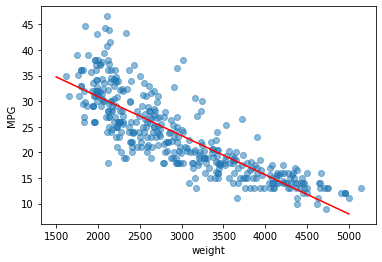

In [81]:
# Your code here
x_weight = df.weight.to_numpy()
x_weight = x_weight.reshape(-1,1)
lx = np.asarray([1]*x_weight.size).reshape(-1,1)
x_weight = np.hstack((lx,x_weight))
result = linearModelFit(x_weight,df.MPG,linearModelLossRSS)

betas = result[0]
x_test = np.linspace(1500,5000,100)
x_grid = np.c_[np.ones(x_test.size),x_test]
x_test = x_test.reshape(-1,1)
lx = np.asarray([1]*x_test.size).reshape(-1,1)
x = np.hstack((lx,x_test))
y_predict = linearModelPredict(betas,x)


plt.scatter(df.weight,df.MPG,alpha=0.5)
plt.plot(x_test,y_predict,color='red')
plt.xlabel("weight")
plt.ylabel("MPG");
print('R2:',result[1])


## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [82]:
# Your code here
def linearModelLossLAD(beta,X,y):
  predY = linearModelPredict(beta,X)
  res = y-predY
  loss = np.sum(abs(y-predY))
  d_beta0 = -np.sum(np.sign(res))
  d_beta1 = -np.sum((np.sign(res)*X[:,1]))
  gradient = np.append(np.array(d_beta0),d_beta1)
  return (loss,gradient)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
linearModelLossLAD(b,X,y)


(2.0, array([-1., -1.]))

### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of 100 equally spaced car weights.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? How their $R^2$ values compare? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:506: RuntimeWarning: Method Powell does not use gradient information (jac).
  RuntimeWarning)


R2: 0.685033249084241


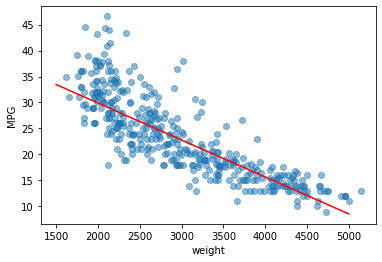

In [83]:
# Your code here
result = linearModelFit(x_weight,df.MPG,linearModelLossLAD)
betas = result[0]
x_test = np.linspace(1500,5000,100)
y_predict = linearModelPredict(betas,x)

plt.scatter(df.weight,df.MPG,alpha=0.5)
plt.plot(x_test,y_predict,color='red')
plt.xlabel("weight")
plt.ylabel("MPG");

print("R2:",result[1])


0.685< 0.6926. The result from L1 lost function is less than result from L2 loss function. Because least square is miniming the sum of saure residuals itself, it always have the highsest r2 value. 

### Question 2.3: /15 points

Now we will use all data for the fit. Fit an OLS model to the car data (excluding the name) with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class.  In no more than two sentences, comment on the $R^2$ values from `sklearn` and the $R^2$ values from your models. Are they similar?

In [84]:
# Your code here
from sklearn.linear_model import LinearRegression
df.shape
x = np.array(df.weight).reshape(-1,1)
y = df.MPG
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(r_sq)

0.6926304331206254


The r2 from model OLS regression is the same as the r2 from linearRegression function. And the result from LAD loss function has the similar value with the result from sklearn function. 